In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from matplotlib.patches import Polygon

In [2]:
data=pd.read_csv('/home/wallhorn/DLC_Projects/top_view_08_2022-Wallhorn-2022-08-11/new_videos/pose_estimation/OF_Trial_10_trimmed_off_2DLC_resnet50_top_view_08_2022Aug11shuffle1_500000.csv')

headers = data.iloc[0] + '_' + data.iloc[1]
new_df  = pd.DataFrame(data.values[2:], columns=headers)
new_df.drop(columns=['bodyparts_coords'], inplace=True)
new_df=new_df.astype('float')


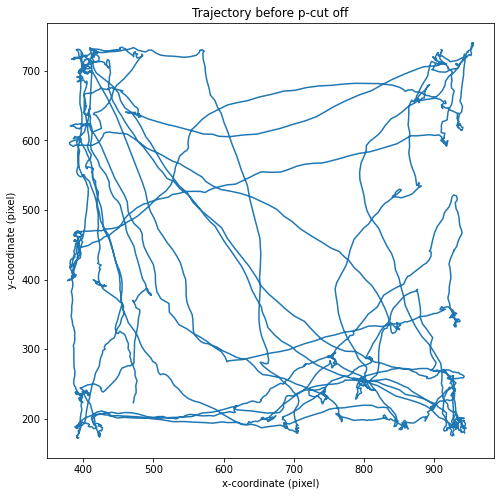

In [3]:
fig=plt.figure(figsize=(8,8))
plt.plot(new_df['neck_center_x'], new_df['neck_center_y'])

ax=plt.gca()
plt.xlabel('x-coordinate (pixel)')
plt.ylabel('y-coordinate (pixel)')
plt.title('Trajectory before p-cut off')
plt.show()


Now you can definde a p-cut off and check how many time points where not tracked

In [4]:
p_cut_off=0.95

likelihood_bool=new_df['neck_center_likelihood']<p_cut_off
print(likelihood_bool.value_counts())

False    3668
True       84
Name: neck_center_likelihood, dtype: int64


In [5]:
new_df['neck_center_x'][likelihood_bool]=np.nan
new_df['neck_center_y'][likelihood_bool]=np.nan

#print(new_df['neck_center_x'].isna().sum())

84


In [6]:
new_df=new_df.interpolate(method='linear')

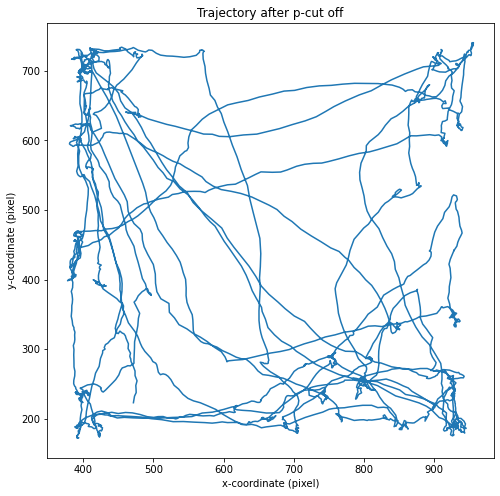

In [7]:
fig=plt.figure(figsize=(8,8))
plt.plot(new_df['neck_center_x'], new_df['neck_center_y'])

ax=plt.gca()
plt.xlabel('x-coordinate (pixel)')
plt.ylabel('y-coordinate (pixel)')
plt.title('Trajectory after p-cut off')
plt.show()

In [8]:
label_list=['nose', 'left_ear', 'right_ear', 'neck_center', 'left_hip', 'right_hip', 'tail_base']
p_cut_off=0.95

for i in label_list:
    
    likelihood_bool=new_df[''.join([i, '_likelihood'])] <p_cut_off
    new_df[''.join([i, '_x'])][likelihood_bool]=np.nan
    new_df[''.join([i, '_y'])][likelihood_bool]=np.nan
    

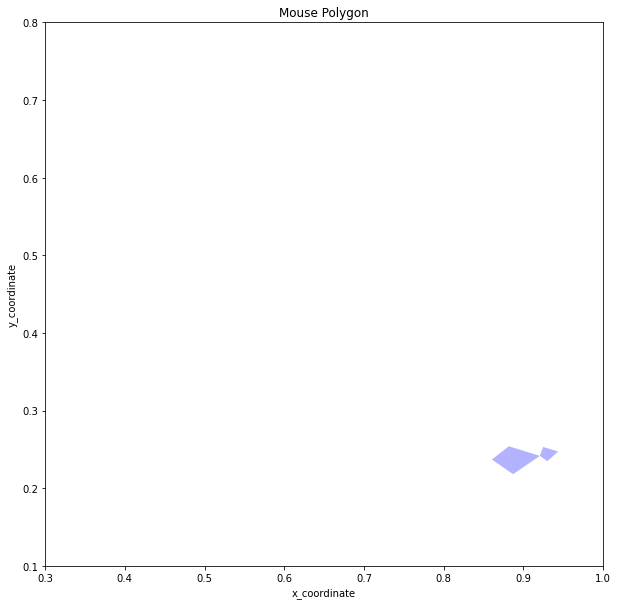

In [9]:
plot_frame_no=598

plot_df=new_df.copy().iloc[plot_frame_no]

x_coordinates=[]
y_coordinates=[]

xy_list=[]
for i in label_list:
    x_label=''.join([i, '_x'])
    y_label=''.join([i, '_y'])
    
    i_coordinates=[]
    i_coordinates.append(new_df.loc[plot_frame_no, x_label])
    i_coordinates.append(new_df.loc[plot_frame_no, y_label])
    xy_list.append(i_coordinates)
    
    
    x_coordinates.append(new_df.loc[plot_frame_no, x_label])
    y_coordinates.append(new_df.loc[plot_frame_no, y_label])
    
xy_array=np.array(xy_list)    
xy_array_1=xy_array[:3]/1000
xy_array_2=xy_array[1:4]/1000
xy_array_3=xy_array[3:6]/1000
xy_array_4=xy_array[4:]/1000
    
p_1 = Polygon(xy_array_1, facecolor = 'blue', closed=True, alpha=0.3)
p_2 = Polygon(xy_array_2, facecolor = 'blue', closed=True, alpha=0.3)
p_3 = Polygon(xy_array_3, facecolor = 'blue', closed=True, alpha=0.3)
p_4 = Polygon(xy_array_4, facecolor = 'blue', closed=True, alpha=0.3)

fig,ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.add_patch(p_1)
ax.add_patch(p_2)
ax.add_patch(p_3)
ax.add_patch(p_4)
ax.set_xlim([0.3,1])
ax.set_ylim([0.1,0.8])
plt.xlabel('x_coordinate')
plt.ylabel('y_coordinate')
plt.title('Mouse Polygon')
plt.show()
    